In [1]:
pip install -r requirements.txt

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.7 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 55.9 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


FULL DF: 
(5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
Number of rows cleaned up: 0


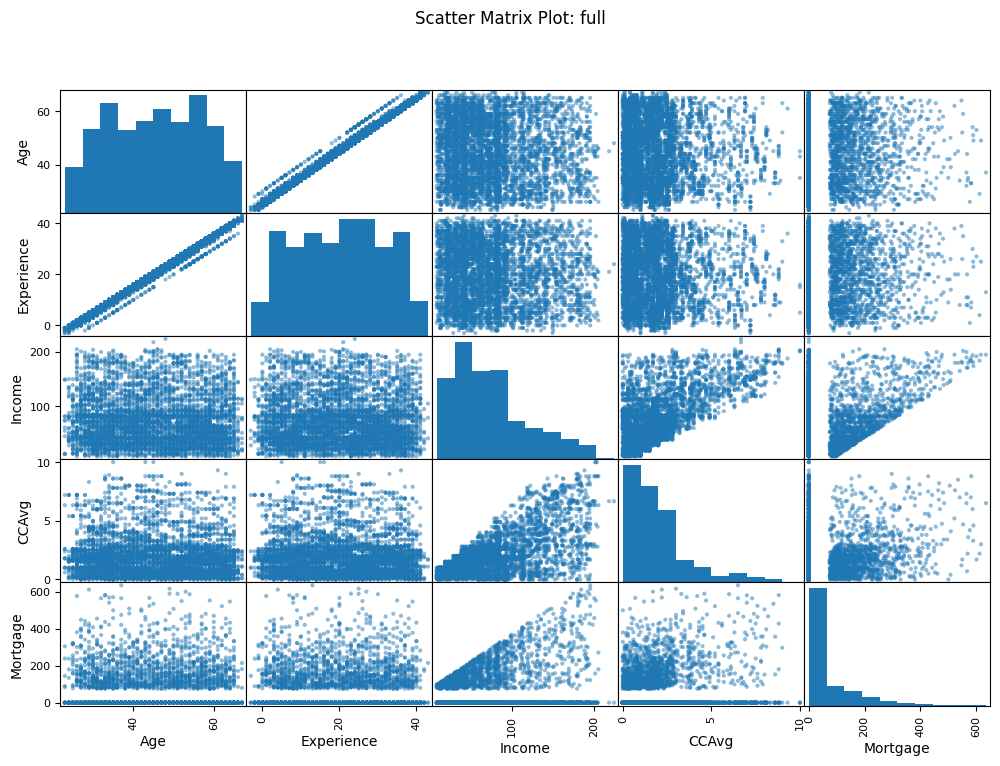

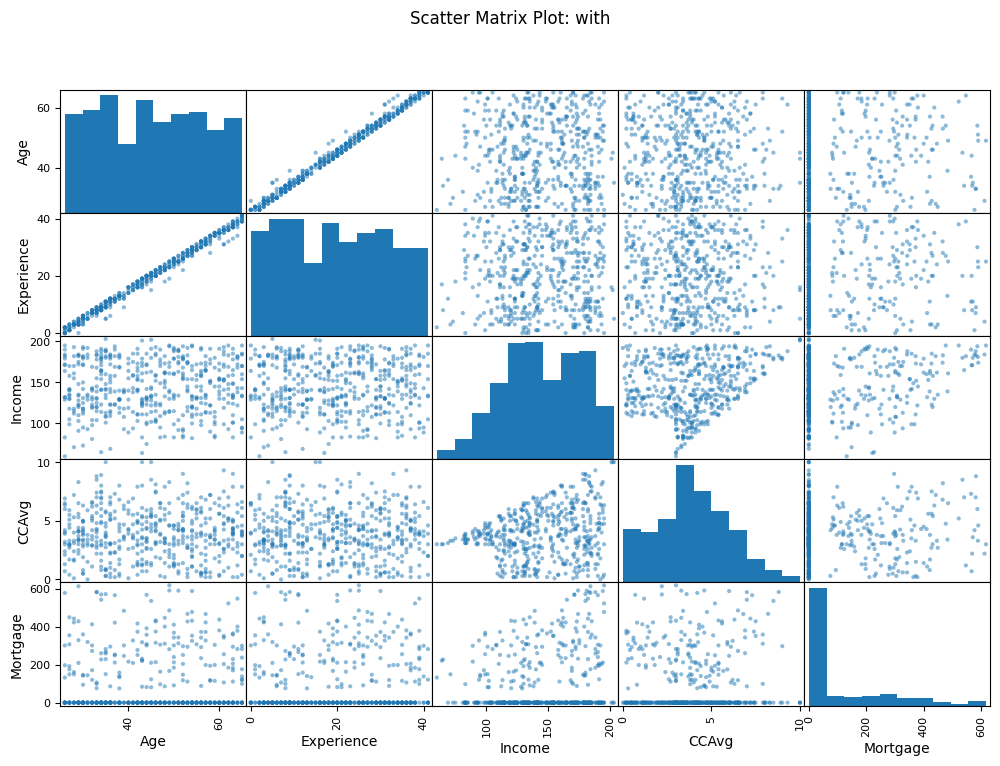

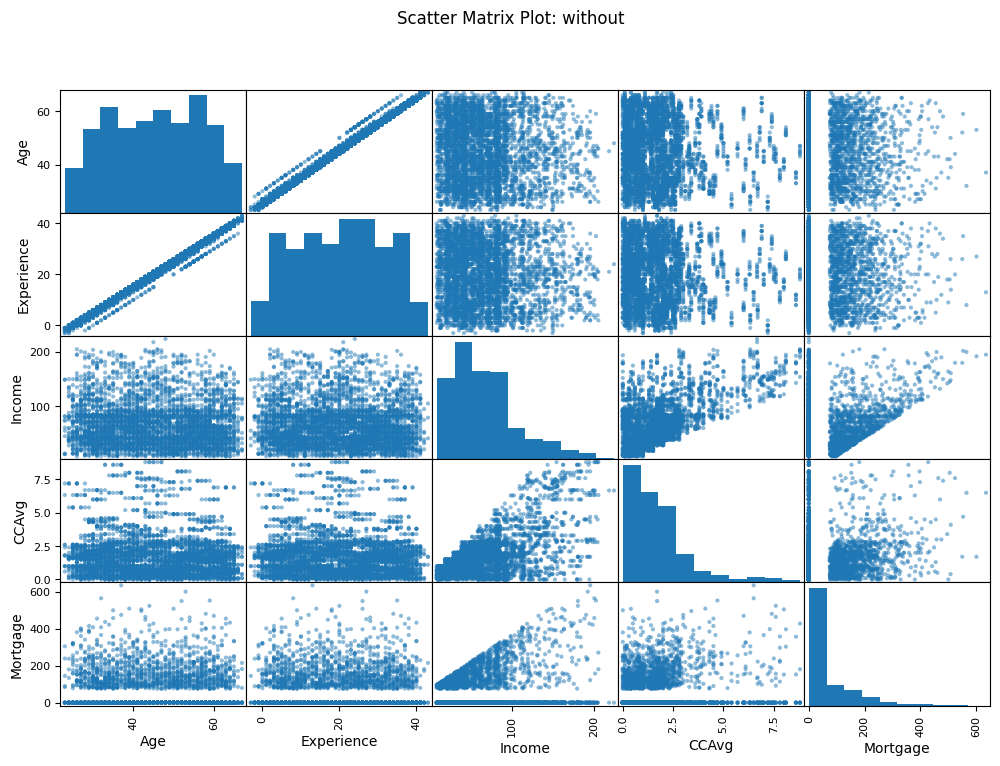

WITH LOAN: 
<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 9 to 4980
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  480 non-null    int64  
 1   Age                 480 non-null    int64  
 2   Experience          480 non-null    int64  
 3   Income              480 non-null    int64  
 4   ZIP Code            480 non-null    int64  
 5   Family              480 non-null    int64  
 6   CCAvg               480 non-null    float64
 7   Education           480 non-null    int64  
 8   Mortgage            480 non-null    int64  
 9   Personal Loan       480 non-null    int64  
 10  Securities Account  480 non-null    int64  
 11  CD Account          480 non-null    int64  
 12  Online              480 non-null    int64  
 13  CreditCard          480 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 56.2 KB
WITHOUT LOAN: 
<class 'pandas.core.frame.DataFrame'

<Figure size 1200x800 with 0 Axes>

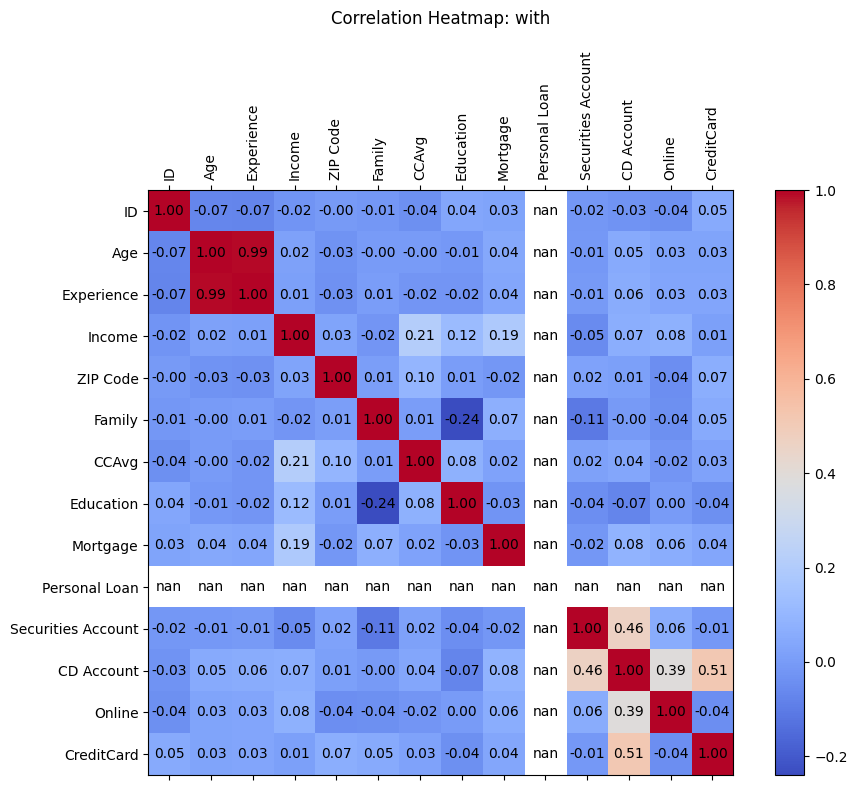

<Figure size 1200x800 with 0 Axes>

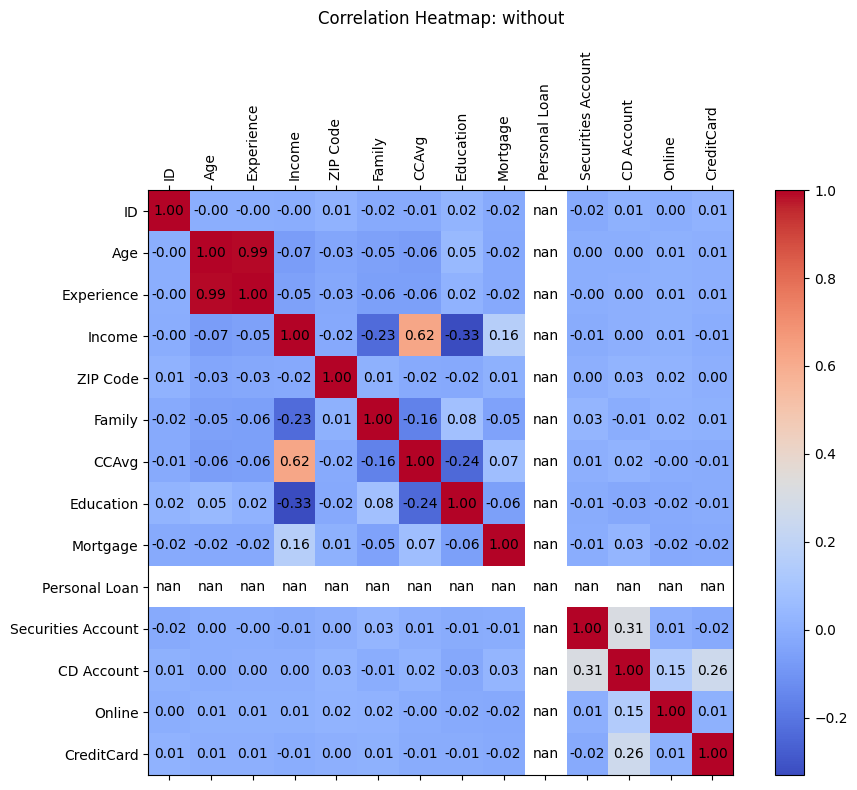

<Figure size 1200x800 with 0 Axes>

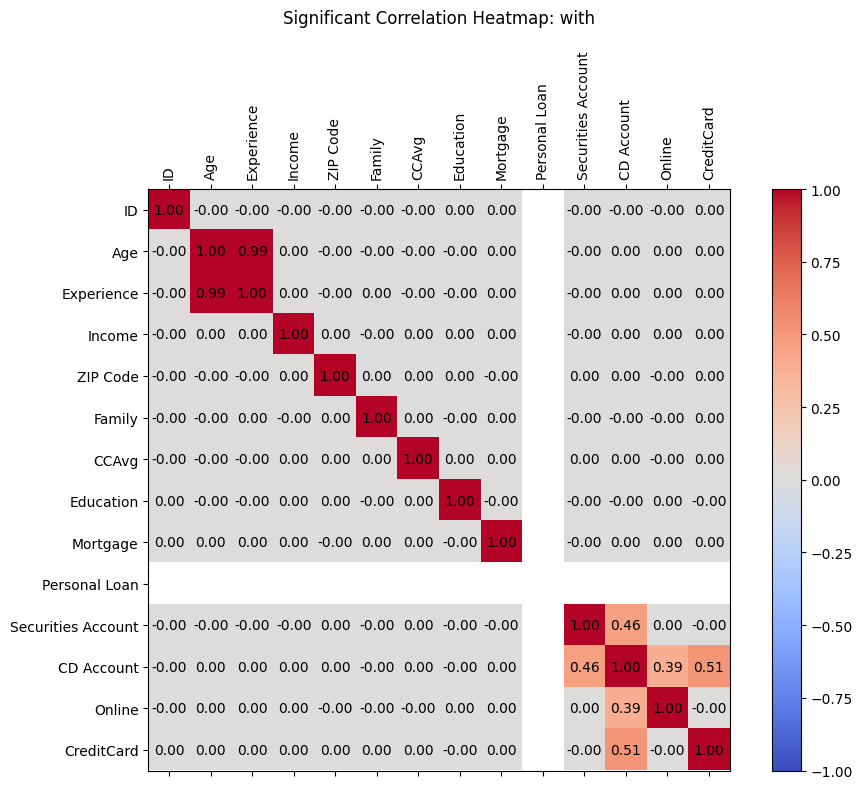

<Figure size 1200x800 with 0 Axes>

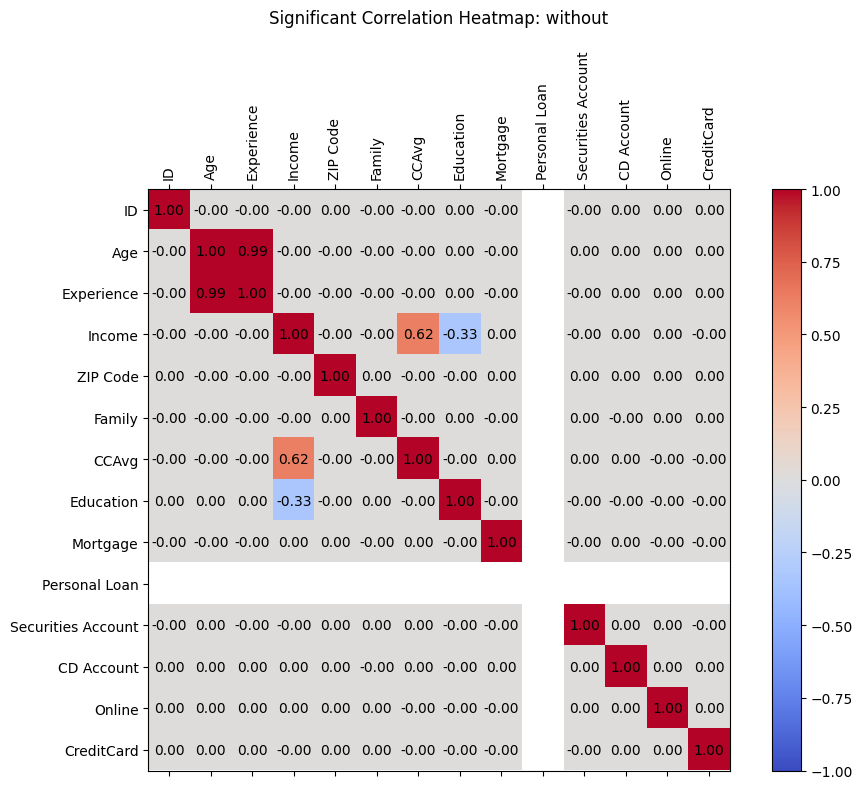

<Figure size 1200x800 with 0 Axes>

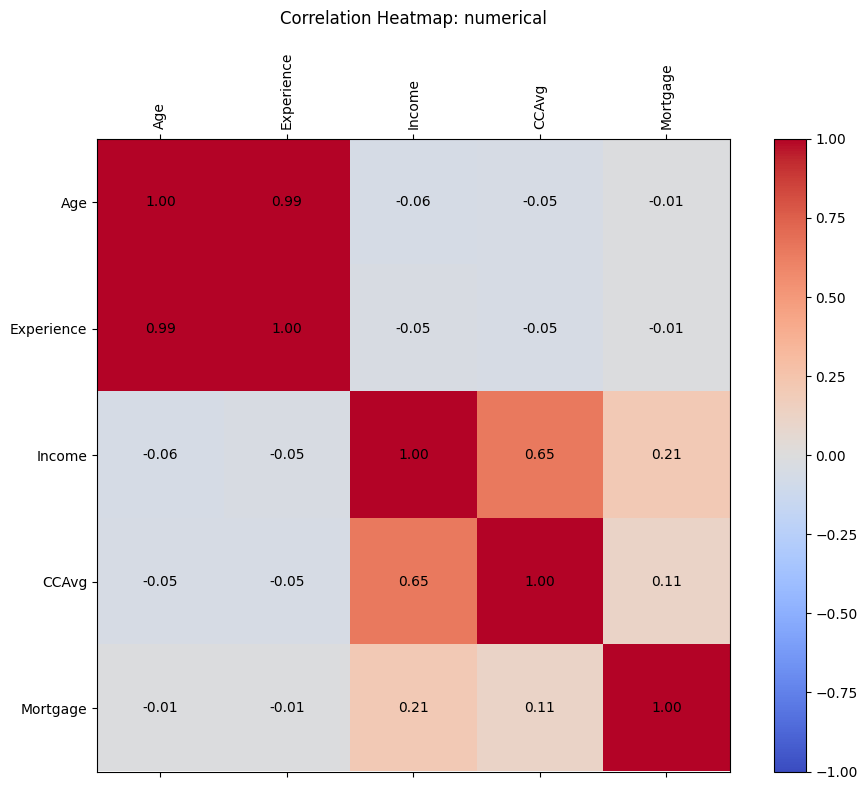

<Figure size 1200x800 with 0 Axes>

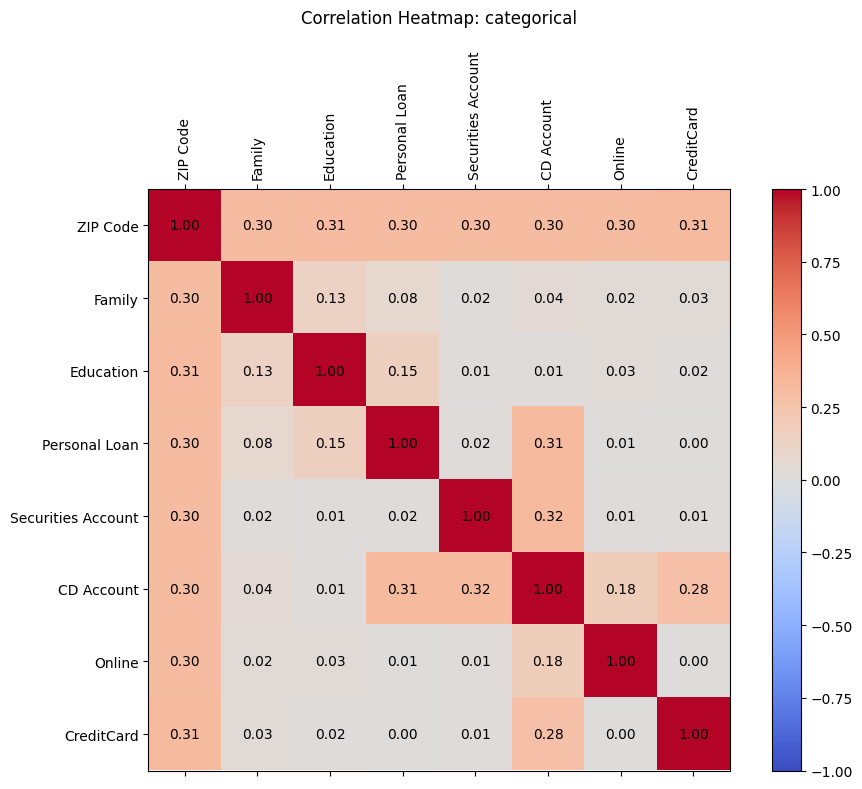

<Figure size 1200x800 with 0 Axes>

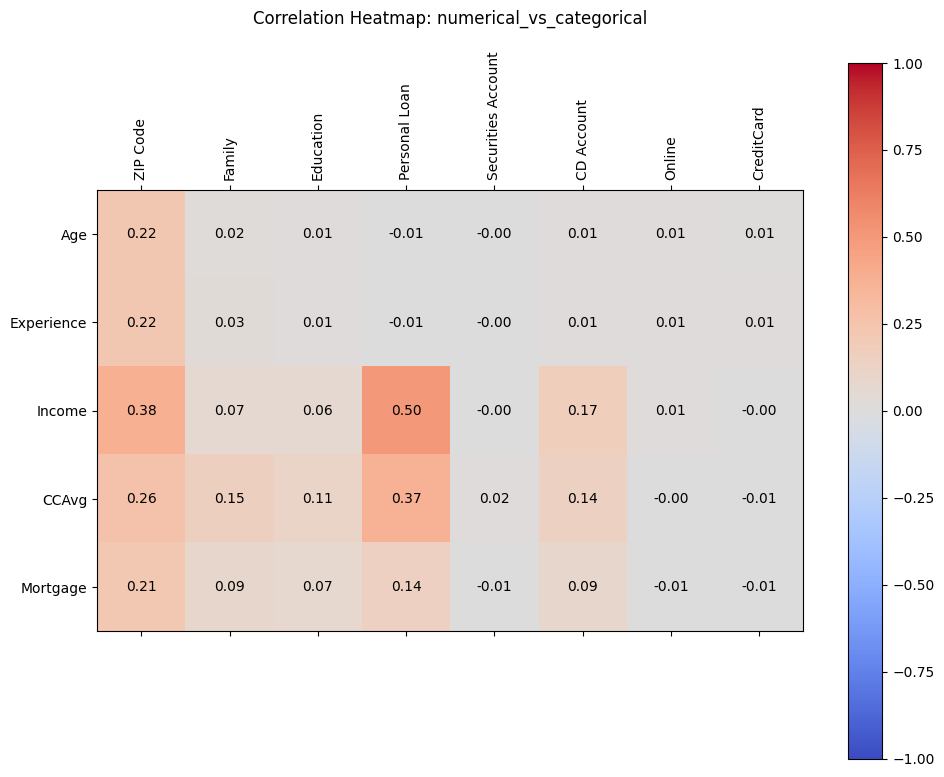

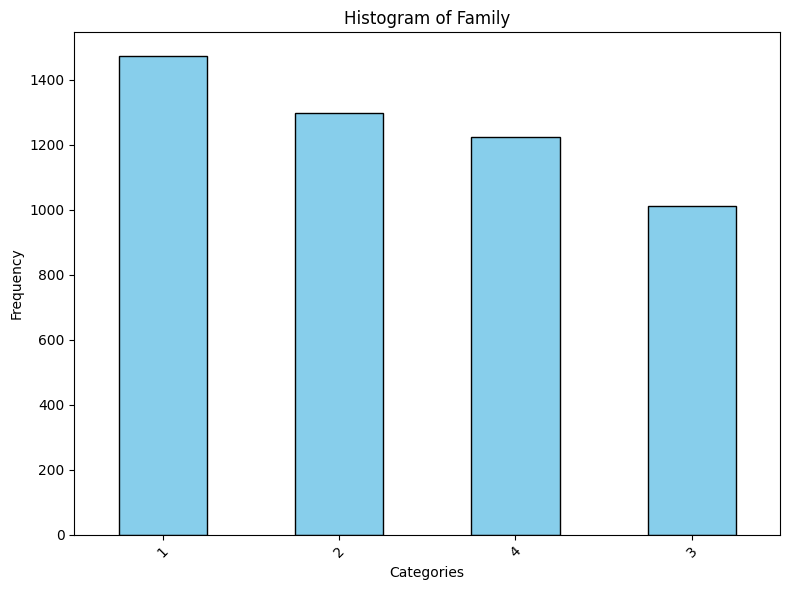

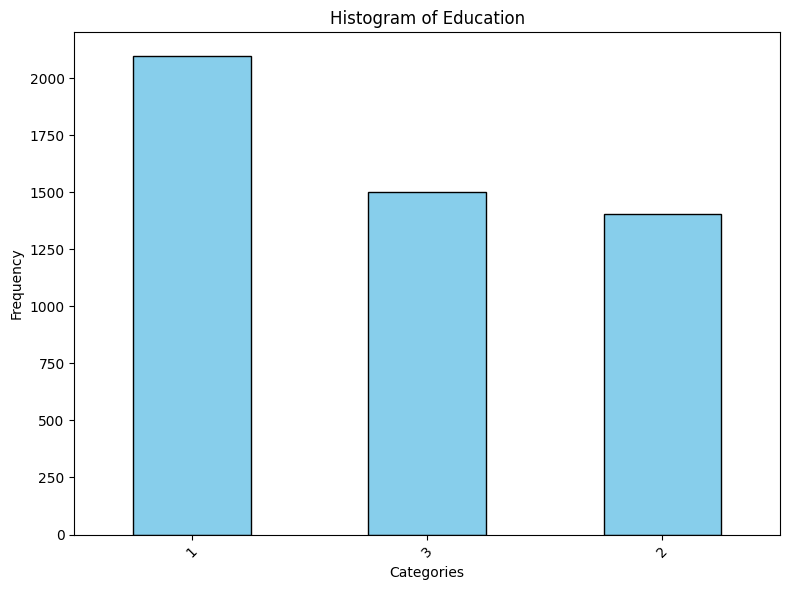

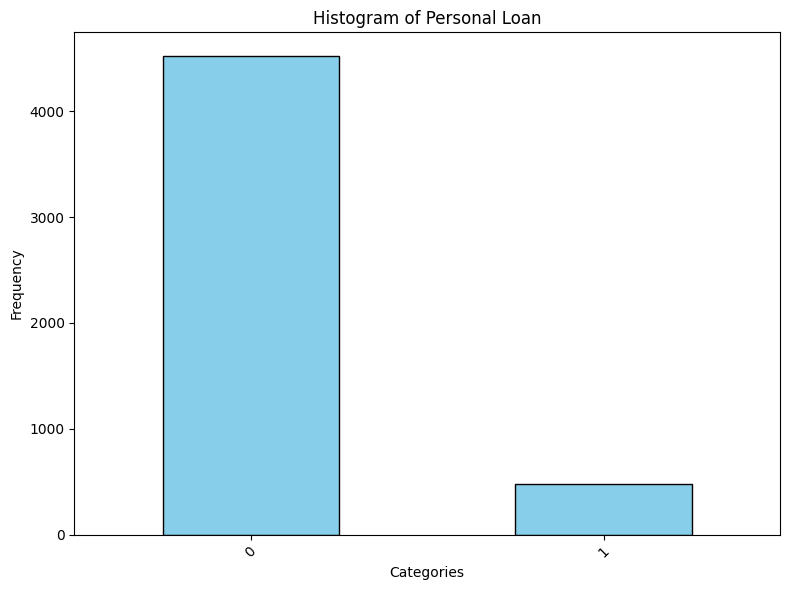

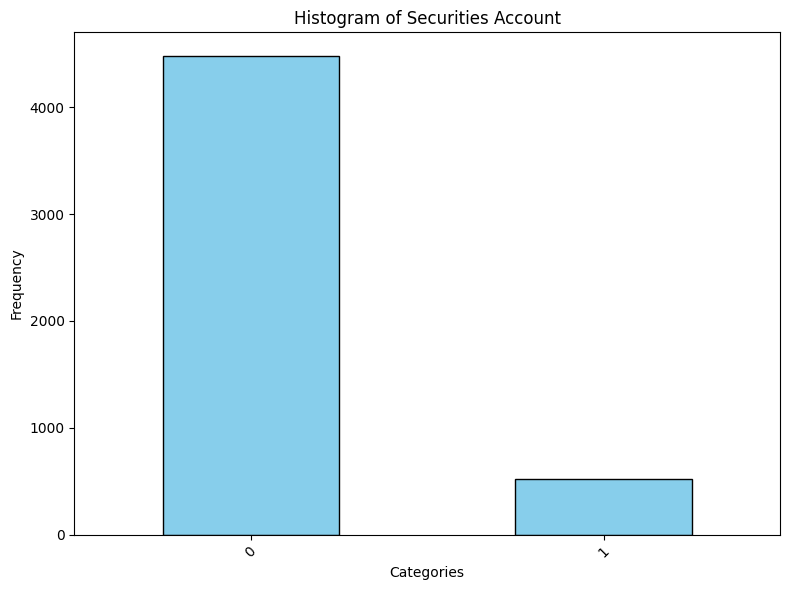

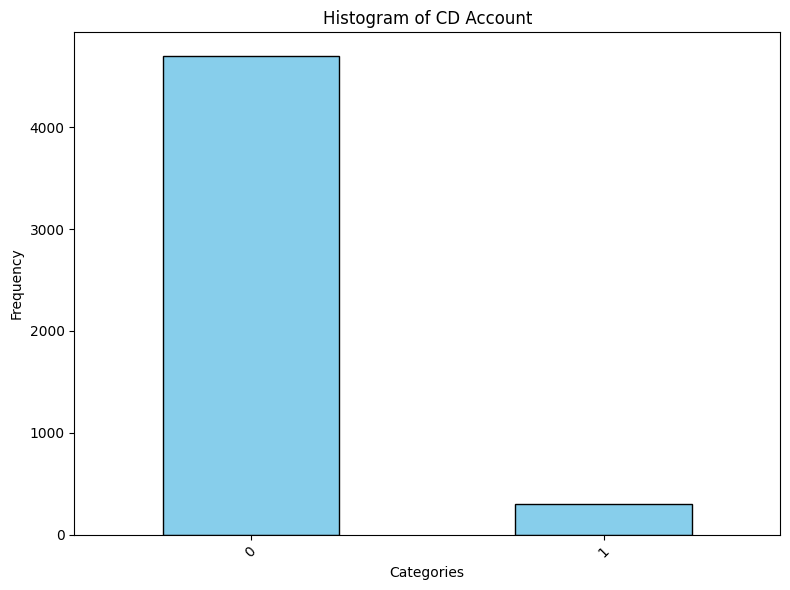

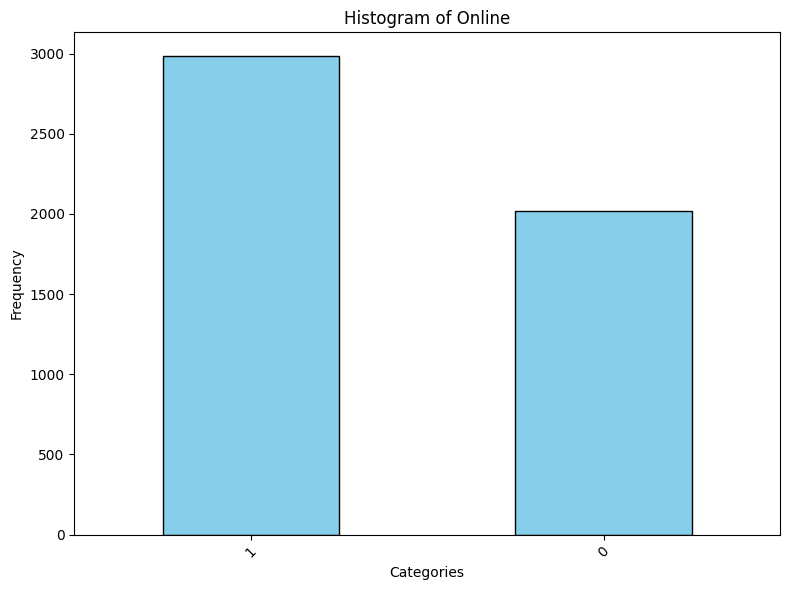

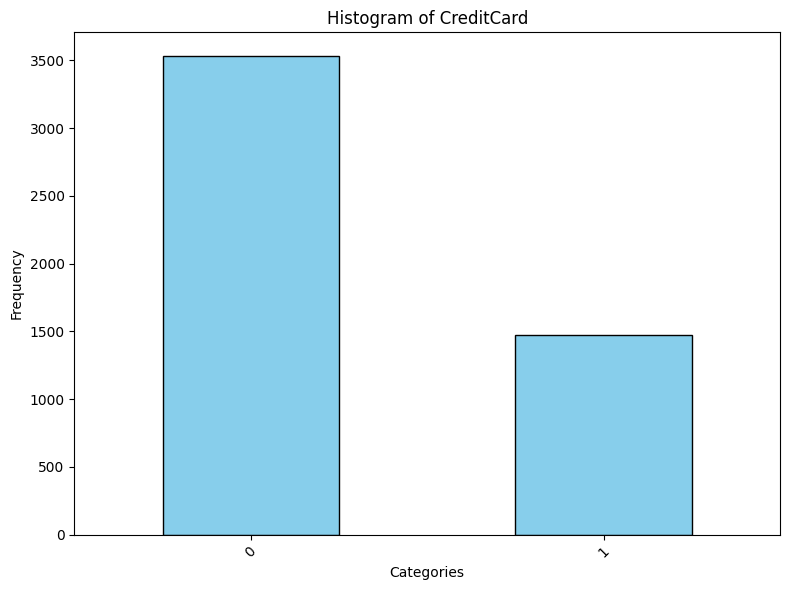

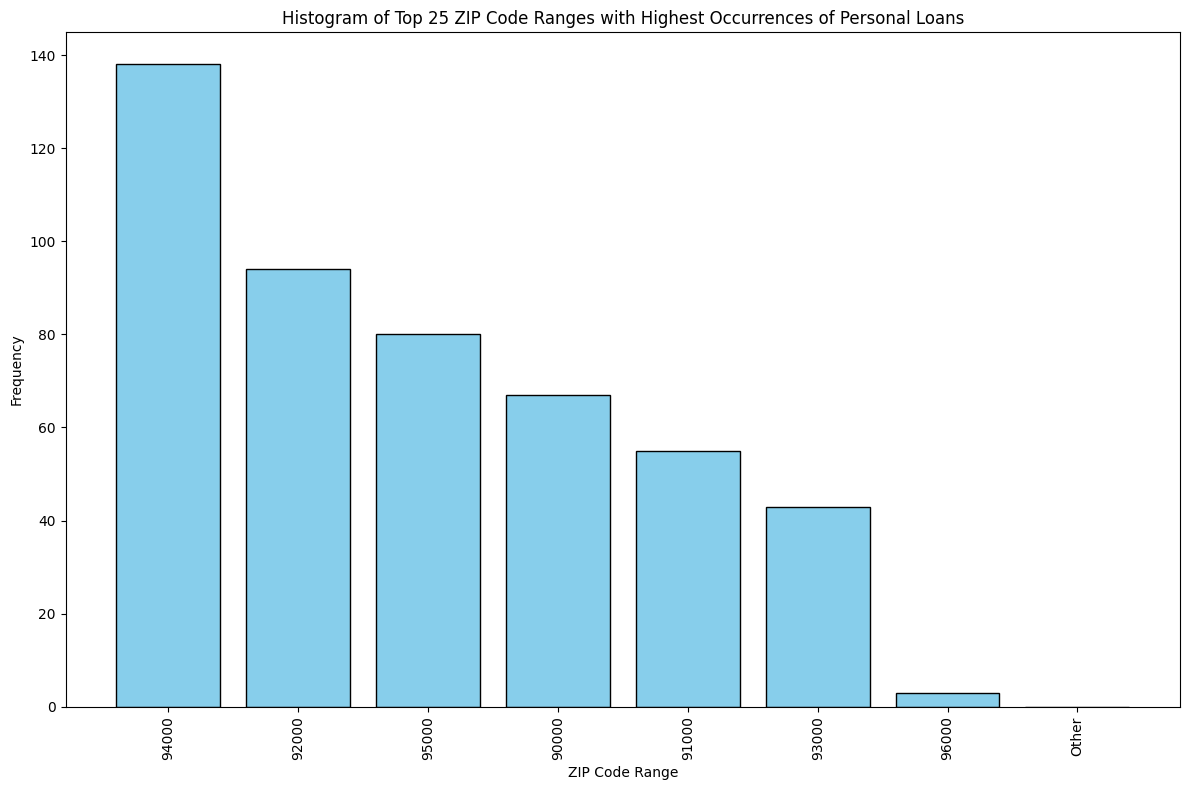

loan_counts_by_range:  Personal Loan      0    1
ZIP Code Range           
9000               1    0
90000            636   67
91000            510   55
92000            894   94
93000            373   43
94000           1334  138
95000            735   80
96000             37    3


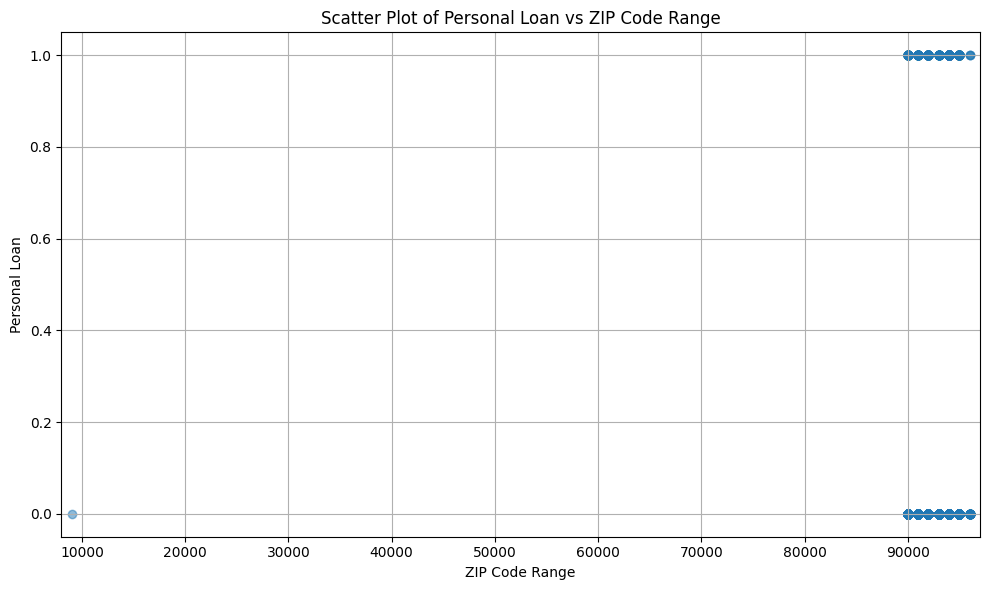


MULTIVARIATE LINEAR REGRESSION MODEL 

(5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
Numbe

Age:  40
Experience (years):  20
Income (in $1000s):  230
ZIP Code (5 digit code 10000 to 99999):  94118
Family (1 to 4):  4
Credit Card Average Spending (in $1000s):  10
Education (1 to 3):  3
Mortgage (in $1000):  1000
Securities Account (0 or 1):  1
CD Account (0 or 1):  1
Online (0 or 1):  1
Credit Card (0 or 1):  1


Regression Model Prediction: 1.095953041832717
Regression Model Converted Prediction: 0.9999822060849968
Classification Model Prediction (0: No Personal Loan, 1: Personal Loan): 1
Improved Linear Model Prediction (0: No Personal Loan, 1: Personal Loan): 1


In [1]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from scipy.stats import norm
from scipy.stats import pointbiserialr, chi2_contingency



class Visa4Lisa:
    def __init__(self, csv_input) -> None:
        self.full_df = pd.read_csv(csv_input)
        self.with_loan, self.without_loan = self.split_dataset_by_loan_status(self.full_df)
        self.numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
        self.categorical_columns = ['ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
        if not os.path.exists('visualizations'):
            os.makedirs('visualizations')
        if not os.path.exists('visualizations/histograms'):
            os.makedirs('visualizations/histograms')
        if not os.path.exists('visualizations/scatter_plots'):
            os.makedirs('visualizations/scatter_plots')

    def clean_dataset(self, input_df):
        print(input_df.shape)
        input_df.info()
        initial_rows = input_df.shape[0]
        input_df = input_df.dropna()
        input_df = input_df.drop_duplicates()
        input_df = input_df.replace('NaN', np.nan).dropna()
        final_rows = input_df.shape[0]
        rows_deleted = initial_rows - final_rows
        print(f'Number of rows cleaned up: {rows_deleted}')
        return input_df
    
    def split_dataset_by_loan_status(self, input_df):
        with_loan = input_df[input_df['Personal Loan'] == 1]
        without_loan = input_df[input_df['Personal Loan'] == 0]
        return with_loan, without_loan

    def scatter_matrix_numerical(self, input_df, name="default_dataset"):
        numerical_columns = [col for col in self.numerical_columns if col in input_df.columns and input_df[col].nunique() > 1]
        if len(numerical_columns) < 2:
            print(f"Not enough numerical columns with non-identical values for scatter matrix plot in {name}")
            return
        scatter_matrix(input_df[numerical_columns], figsize=(12, 8))
        plt.suptitle(f'Scatter Matrix Plot: {name}')
        plt.savefig(f'visualizations/scatter_matrix_{name}.png')
        plt.show()
        plt.close()

    def correlation_heatmap(self, input_df, name="default_dataset"):
        plt.figure(figsize=(12, 8))
        correlation_matrix = input_df.corr()
        fig, ax = plt.subplots(figsize=(10, 8))
        cax = ax.matshow(correlation_matrix, cmap='coolwarm')
        plt.colorbar(cax)
        ticks = range(len(correlation_matrix.columns))
        plt.xticks(ticks, correlation_matrix.columns, rotation=90)
        plt.yticks(ticks, correlation_matrix.columns)
        for (i, j), val in np.ndenumerate(correlation_matrix.values):
            plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
        plt.title(f'Correlation Heatmap: {name}', pad=20)
        plt.tight_layout()
        plt.savefig(f'visualizations/correlation_heatmap_{name}.png')
        plt.show()
        plt.close()

    def significant_correlation_heatmap(self, input_df, upper_threshold, lower_threshold, name="significant_dataset"):
        correlation_matrix = input_df.corr()
        significant_mask = (correlation_matrix >= upper_threshold) | (correlation_matrix <= lower_threshold)
        filtered_correlation_matrix = correlation_matrix * significant_mask
        plt.figure(figsize=(12, 8))
        fig, ax = plt.subplots(figsize=(10, 8))
        cax = ax.matshow(filtered_correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
        plt.colorbar(cax)
        ticks = range(len(filtered_correlation_matrix.columns))
        plt.xticks(ticks, filtered_correlation_matrix.columns, rotation=90)
        plt.yticks(ticks, filtered_correlation_matrix.columns)
        for (i, j), val in np.ndenumerate(filtered_correlation_matrix.values):
            if not np.isnan(val):
                plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
        plt.title(f'Significant Correlation Heatmap: {name}', pad=20)
        plt.tight_layout()
        plt.savefig(f'visualizations/significant_correlation_heatmap_{name}.png')
        plt.show()
        plt.close()

    def calculate_entropy(self, x):
        p = pd.Series(x).value_counts() / len(x)
        entropy = -np.sum(p * np.log2(p))
        return entropy

    def calculate_conditional_entropy(self, x, y):
        y_grouped = y.groupby(y)
        entropy = 0
        for yi, y_subset in y_grouped:
            subset_prob = len(y_subset) / len(y)
            subset_entropy = self.calculate_entropy(x[y == yi])
            entropy += subset_prob * subset_entropy
        return entropy

    def theils_u(self, x, y):
        s_xy = self.calculate_conditional_entropy(x, y)
        s_x = self.calculate_entropy(x)
        if s_x == 0:
            return 1  # No uncertainty in x
        return (s_x - s_xy) / s_x

    def compute_correlation(self, input_df, type_of_data):
        if type_of_data == 'numerical':
            return input_df[self.numerical_columns].corr()
        elif type_of_data == 'categorical':
            n = len(self.categorical_columns)
            corr_matrix = np.zeros((n, n))
            for i in range(n):
                for j in range(n):
                    if i == j:
                        corr_matrix[i, j] = 1.0
                    else:
                        col1, col2 = input_df[self.categorical_columns[i]], input_df[self.categorical_columns[j]]
                        table = pd.crosstab(col1, col2)
                        chi2 = chi2_contingency(table)[0]
                        n_obs = np.sum(table.values)
                        cramer_v = np.sqrt(chi2 / n_obs / (min(table.shape) - 1))
                        corr_matrix[i, j] = cramer_v if cramer_v <= 1 else np.nan
            return pd.DataFrame(corr_matrix, index=self.categorical_columns, columns=self.categorical_columns)
        elif type_of_data == 'numerical_vs_categorical':
            corr_matrix = pd.DataFrame(index=self.numerical_columns, columns=self.categorical_columns)
            for num_col in self.numerical_columns:
                for cat_col in self.categorical_columns:
                    if input_df[cat_col].nunique() == 2:  # Binary categorical
                        corr_matrix.loc[num_col, cat_col] = pointbiserialr(input_df[cat_col], input_df[num_col])[0]
                    else:  # Multi-level categorical
                        corr_matrix.loc[num_col, cat_col] = self.theils_u(input_df[cat_col], input_df[num_col])
            return corr_matrix.astype(float)
        else:
            raise ValueError("Invalid type_of_data specified")

    def plot_heatmap(self, type_of_data, name="default_dataset"):
        correlation_matrix = self.compute_correlation(self.full_df, type_of_data)
        plt.figure(figsize=(12, 8))
        fig, ax = plt.subplots(figsize=(10, 8))
        cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
        plt.colorbar(cax)
        ticks_x = range(len(correlation_matrix.columns))
        ticks_y = range(len(correlation_matrix.index))
        plt.xticks(ticks_x, correlation_matrix.columns, rotation=90)
        plt.yticks(ticks_y, correlation_matrix.index)
        for (i, j), val in np.ndenumerate(correlation_matrix.values):
            if not np.isnan(val):
                plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
        plt.title(f'Correlation Heatmap: {name}', pad=20)
        plt.tight_layout()
        plt.savefig(f'visualizations/correlation_heatmap_{name}.png')
        plt.show()
        plt.close()
 
    def explore_heatmap_profiles(self):
        self.plot_heatmap('numerical', 'numerical')
        self.plot_heatmap('categorical', 'categorical')
        self.plot_heatmap('numerical_vs_categorical', 'numerical_vs_categorical')
        
    def bar_plot(self, column):
        plt.figure(figsize=(10, 6))
        self.full_df[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.savefig(f'visualizations/bar_plot_{column}.png')
        plt.show()
        plt.close()

    def pie_chart(self, column):
        plt.figure(figsize=(8, 8))
        self.full_df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Pie Chart of {column}')
        plt.savefig(f'visualizations/pie_chart_{column}.png')
        plt.show()
        plt.close()
        
    def histogram(self, column, bins=10):
        plt.figure(figsize=(8, 6))
        self.full_df[column].plot(kind='hist', bins=bins, edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.savefig(f'visualizations/histogram_{column}.png')
        plt.show()
        plt.close()

    def zip_to_range(self, zip_code, increment=1000):
        return zip_code - (zip_code % increment)
    
    def scatter_plot(self, input_df, column_1, column_2):
        if column_1 == 'ZIP Code':
            input_df['ZIP Code'] = input_df['ZIP Code'].astype(int)
            input_df['ZIP Code Range'] = input_df['ZIP Code'].apply(lambda x: self.zip_to_range(x))
            column_1 = 'ZIP Code Range'
        clean_df = input_df.dropna(subset=[column_1, column_2])
        plt.figure(figsize=(10, 6))
        plt.scatter(clean_df[column_1], clean_df[column_2], alpha=0.5)
        plt.title(f'Scatter Plot of {column_2} vs {column_1}')
        plt.xlabel(column_1)
        plt.ylabel(column_2)
        plt.grid(True)
        if column_1 == 'ZIP Code Range':
            plt.xlim([clean_df[column_1].min() - 1000, clean_df[column_1].max() + 1000])
        plt.tight_layout()
        plt.savefig(f'visualizations/scatter_plots/{column_2}_vs_{column_1}.png')
        plt.show()
        plt.close()

    def plot_categorical_histogram(self, df, column):
        counts = df[column].value_counts()
        plt.figure(figsize=(8, 6))
        counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel('Categories')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'visualizations/histograms/{column}_histogram.png')
        plt.show()
        plt.close()

    def zip_codes_with_high_loans(self, input_df):
        input_df['ZIP Code'] = input_df['ZIP Code'].astype(int)
        input_df['ZIP Code Range'] = input_df['ZIP Code'].apply(lambda x: self.zip_to_range(x))
        range_loan_counts = input_df[input_df['Personal Loan'] == 1].groupby('ZIP Code Range').size()
        sorted_range_loans = range_loan_counts.sort_values(ascending=False)
        top_n = 25
        top_ranges = sorted_range_loans.head(top_n)
        top_ranges_df = top_ranges.reset_index()
        top_ranges_df.columns = ['ZIP Code Range', 'Frequency']
        other_frequency = sorted_range_loans.iloc[top_n:].sum()
        other_row = pd.DataFrame([{'ZIP Code Range': 'Other', 'Frequency': other_frequency}])
        top_ranges_df = pd.concat([top_ranges_df, other_row], ignore_index=True)
        plt.figure(figsize=(12, 8))
        plt.bar(top_ranges_df['ZIP Code Range'].astype(str), top_ranges_df['Frequency'], color='skyblue', edgecolor='black')
        plt.title('Histogram of Top 25 ZIP Code Ranges with Highest Occurrences of Personal Loans')
        plt.xlabel('ZIP Code Range')
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig('visualizations/histograms/top_zip_code_ranges_histogram.png')
        plt.show()
        plt.close()
        return top_ranges_df

    def count_personal_loans_by_zip_range(self, input_df):
        input_df['ZIP Code'] = input_df['ZIP Code'].astype(int)
        input_df['ZIP Code Range'] = input_df['ZIP Code'].apply(lambda x: self.zip_to_range(x))
        loan_counts_by_range = input_df.groupby(['ZIP Code Range', 'Personal Loan']).size().unstack(fill_value=0)
        print('loan_counts_by_range: ', loan_counts_by_range)
        return loan_counts_by_range



class MultiVariateRegressionModel:
    def __init__(self, input_df):
        self.df = input_df.copy()
        self.model = None
        self.scaler = StandardScaler()

    def train_model(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        self.model = LinearRegression()
        self.model.fit(X_train, y_train)
        y_pred = self.model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f'Mean Squared Error: {mse}')
        print(f'R-squared: {r2}')
        return self.model

    def predict(self, X):
        if self.model is not None:
            X = pd.DataFrame(self.scaler.transform(X), columns=X.columns)
            return self.model.predict(X)
        else:
            raise Exception("Model is not trained yet. Call train_model first.")


class MultiVariateClassificationModel:
    def __init__(self, input_df):
        self.df = input_df.copy()
        self.model = None
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']),
                ('cat', OneHotEncoder(), ['Securities Account', 'CD Account', 'Online', 'CreditCard'])
            ])

    def train_model(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        self.model = Pipeline(steps=[
            ('preprocessor', self.preprocessor),
            ('classifier', LogisticRegression())
        ])
        self.model.fit(X_train, y_train)
        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        print(f'Accuracy: {accuracy}')
        print(f'Confusion Matrix:\n{conf_matrix}')
        print(f'Classification Report:\n{class_report}')
        return self.model

    def predict(self, X):
        if self.model is not None:
            return self.model.predict(X)
        else:
            raise Exception("Model is not trained yet. Call train_model first.")


class ImprovedLinearModel:
    def __init__(self, input_df):
        self.df = input_df.copy()
        self.model = None

    def train_model(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        self.model = Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
        ])
        self.model.fit(X_train_resampled, y_train_resampled)
        y_pred = self.model.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

    def predict(self, X):
        if self.model is not None:
            return self.model.predict(X)
        else:
            raise Exception("Model is not trained yet. Call train_model first.")
    
    
def convert_to_probabilities(predictions, mean_pred, std_pred):
    if std_pred == 0:
        raise ValueError("Standard deviation of predictions is zero, cannot standardize predictions.")
    standardized_predictions = (predictions - mean_pred) / std_pred
    probabilities = norm.cdf(standardized_predictions)
    return probabilities


        
def prompt_user_for_input():
    def get_int_input(prompt, min_value=None, max_value=None):
        while True:
            try:
                value = int(input(prompt))
                if (min_value is not None and value < min_value) or (max_value is not None and value > max_value):
                    print(f"Invalid input. Please enter an integer value between {min_value} and {max_value}.")
                else:
                    return value
            except ValueError:
                print("Invalid input. Please enter an integer value.")

    def get_float_input(prompt, min_value=None, max_value=None):
        while True:
            try:
                value = float(input(prompt))
                if (min_value is not None and value < min_value) or (max_value is not None and value > max_value):
                    print(f"Invalid input. Please enter a float value between {min_value} and {max_value}.")
                else:
                    return value
            except ValueError:
                print("Invalid input. Please enter a float value.")

    print("Please enter the following details:")

    age = get_int_input("Age: ", 0)
    experience = get_int_input("Experience (years): ", 0)
    income = get_float_input("Income (in $1000s): ", 0)
    zip_code = get_int_input("ZIP Code (5 digit code 10000 to 99999): ", 10000, 99999)
    family = get_int_input("Family (1 to 4): ", 1, 4)
    cc_avg = get_float_input("Credit Card Average Spending (in $1000s): ", 0)
    education = get_int_input("Education (1 to 3): ", 1, 3)
    mortgage = get_float_input("Mortgage (in $1000): ", 0)
    securities_account = get_int_input("Securities Account (0 or 1): ", 0, 1)
    cd_account = get_int_input("CD Account (0 or 1): ", 0, 1)
    online = get_int_input("Online (0 or 1): ", 0, 1)
    credit_card = get_int_input("Credit Card (0 or 1): ", 0, 1)

    user_data = pd.DataFrame({
        'Age': [age],
        'Experience': [experience],
        'Income': [income],
        'ZIP Code': [zip_code],
        'Family': [family],
        'CCAvg': [cc_avg],
        'Education': [education],
        'Mortgage': [mortgage],
        'Securities Account': [securities_account],
        'CD Account': [cd_account],
        'Online': [online],
        'CreditCard': [credit_card]
    })

    return user_data



# ----------------------------------- Main -----------------------------------
def main():
    # ------------------------ Analysis ------------------------
    data_analysis = Visa4Lisa("Visa_For_Lisa_Loan_Modelling.csv")
    print('FULL DF: '), data_analysis.clean_dataset(data_analysis.full_df)
    data_analysis.scatter_matrix_numerical(data_analysis.full_df, 'full')
    data_analysis.scatter_matrix_numerical(data_analysis.with_loan, 'with')
    data_analysis.scatter_matrix_numerical(data_analysis.without_loan, 'without')
    print('WITH LOAN: '), data_analysis.with_loan.info()
    print('WITHOUT LOAN: '), data_analysis.without_loan.info()
    data_analysis.correlation_heatmap(data_analysis.with_loan, 'with')
    data_analysis.correlation_heatmap(data_analysis.without_loan, 'without')
    data_analysis.significant_correlation_heatmap(data_analysis.with_loan, 0.33, -0.33, 'with')
    data_analysis.significant_correlation_heatmap(data_analysis.without_loan, 0.33, -0.33, 'without')
    data_analysis.explore_heatmap_profiles()
    for col in data_analysis.categorical_columns:
        if col == 'ZIP Code': continue
        else: data_analysis.plot_categorical_histogram(data_analysis.full_df, col)
    data_analysis.zip_codes_with_high_loans(data_analysis.full_df)
    data_analysis.count_personal_loans_by_zip_range(data_analysis.full_df)
    data_analysis.scatter_plot(data_analysis.full_df, 'ZIP Code', 'Personal Loan')
    # ------------------------
    
    # ------------------------ CONSTANTS ------------------------
    feature_columns = [
        'Age', 
        'Experience', 
        'Income', 
        'ZIP Code', 
        'Family', 
        'CCAvg', 
        'Education', 
        'Mortgage', 
        'Securities Account', 
        'CD Account', 
        'Online', 
        'CreditCard'
    ]
    target_column = 'Personal Loan'
    BLUE = "\033[94m"
    RESET = "\033[0m"
    # ------------------------
    
    # ------------------------ Regression Model ------------------------
    print(f'{BLUE}\nMULTIVARIATE LINEAR REGRESSION MODEL{RESET} \n')

    predictive_model_mvlr = Visa4Lisa("Visa_For_Lisa_Loan_Modelling.csv")
    predictive_model_mvlr.clean_dataset(predictive_model_mvlr.full_df)
    X = predictive_model_mvlr.full_df[feature_columns]
    y = predictive_model_mvlr.full_df[target_column]
    model_mvlr = MultiVariateRegressionModel(input_df=predictive_model_mvlr.full_df)
    X_scaled = pd.DataFrame(model_mvlr.scaler.fit_transform(X), columns=feature_columns)
    model_mvlr.train_model(X_scaled, y)
    X_scaled_for_prediction = pd.DataFrame(model_mvlr.scaler.transform(X), columns=feature_columns)
    predictions_mvlr = model_mvlr.predict(X_scaled_for_prediction)
    print('Regression Model Predictions => ', predictions_mvlr)
    mean_pred = np.mean(predictions_mvlr)
    std_pred = np.std(predictions_mvlr)
    print('convert_to_probabilities => ', convert_to_probabilities(predictions_mvlr, mean_pred, std_pred))
    # ------------------------
    
    # ------------------------ Classification Model ------------------------
    print(f'{BLUE}\nMULTIVARIATE CLASSIFICATION MODEL{RESET} \n')

    predictive_model_mvc = Visa4Lisa("Visa_For_Lisa_Loan_Modelling.csv")
    predictive_model_mvc.clean_dataset(predictive_model_mvc.full_df)
    X = predictive_model_mvc.full_df[feature_columns]
    y = predictive_model_mvc.full_df[target_column]
    model_mvc = MultiVariateClassificationModel(input_df=predictive_model_mvc.full_df)
    model_mvc.train_model(X, y)
    predictions_mvc = model_mvc.predict(X)
    print('Classification Model Predictions => ', predictions_mvc)
    # ------------------------
    
    # ------------------------ Improved Linear Model ------------------------
    print(f'{BLUE}\nIMPROVED LINEAR MODEL{RESET} \n')
    predictive_model_ilm = Visa4Lisa("Visa_For_Lisa_Loan_Modelling.csv")
    predictive_model_ilm.clean_dataset(predictive_model_ilm.full_df)
    X = predictive_model_ilm.full_df[feature_columns]
    y = predictive_model_ilm.full_df[target_column]
    model_ilm = ImprovedLinearModel(input_df=predictive_model_ilm.full_df)
    model_ilm.train_model(X, y)
    predictions_ilm = model_ilm.predict(X)
    print('Improved Linear Predictions => ', predictions_ilm)
    #  ------------------------
    

    # ------------------------ GET USER INPUT AND MAKE PREDICTIONS ------------------------
    print(f'{BLUE}\nENTER CUSTOMER DATA AND PREDICT IF THEY USE A LOAN\n{RESET}')
    user_input = prompt_user_for_input()
    
    # Predict using the Regression Model
    regression_prediction = model_mvlr.predict(user_input)
    print(f'Regression Model Prediction: {regression_prediction[0]}')
    print(f'Regression Model Converted Prediction: {convert_to_probabilities(regression_prediction[0], mean_pred, std_pred)}')

    # Predict using the Classification Model
    classification_prediction = model_mvc.predict(user_input)
    print(f'Classification Model Prediction (0: No Personal Loan, 1: Personal Loan): {classification_prediction[0]}')

    # Predict using the Improved Linear Model
    improved_linear_prediction = model_ilm.predict(user_input)
    print(f'Improved Linear Model Prediction (0: No Personal Loan, 1: Personal Loan): {improved_linear_prediction[0]}')
    #  ------------------------



if __name__ == "__main__":
    main()
